# Визуализация с помощью библиотеки Seaborn

## Seaborn по сравнению с Matplotlib

Вот пример простого графика случайных блужданий с использованием стиля classic для форматирования и цветов графика. Начнем с обычных импортов:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Создаем данные случайных блужданий:

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Рисуем простой график

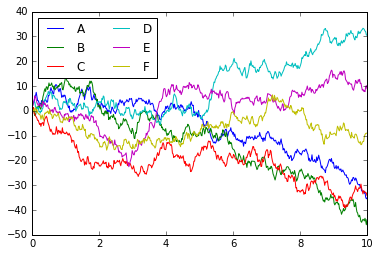

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Хотя результат содержит всю информацию, которую нам требуется донести до читателя, это происходит не слишком приятным глазу образом, и даже выглядит слегка старомодным в свете современных визуализаций данных.

Теперь посмотрим, как можно сделать это с помощью Seaborn. Помимо множества собственных высокоуровневых функций построения графиков библиотеки Seaborn, она может также перекрывать параметры по умолчанию библиотеки Matplotlib, благодаря чему применение даже более простых сценариев Matplotlib приводит к намного лучшему результату. Задать стиль можно с помощью метода set() библиотеки Seaborn. По принятым соглашениям Seaborn импортируется под именем sns:

In [4]:
import seaborn as sns
sns.set()

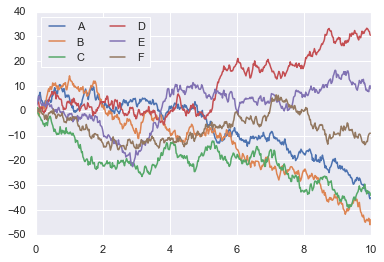

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Анализируем графики библиотеки Seaborn

Основная идея библиотеки Seaborn — предоставление высокоуровневых команд для создания множества различных типов графиков, удобных для исследования статистических данных и даже подгонки статистических моделей.
Рассмотрим некоторые из имеющихся в Seaяborn наборов данных и типов графиков. Обратите внимание, что все изложенное далее можно выполнить и с помощью обычных команд библиотеки Matplotlib, но API Seaborn намного более удобен.

### Гистограммы, KDE и плотности

Зачастую все, что нужно сделать при визуализации статистических данных, — это построить гистограмму и график совместного распределения переменных. Мы уже видели, что в библиотеке Matplotlib сделать это относительно несложно:

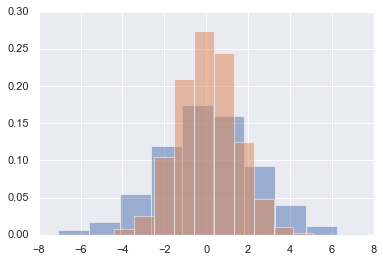

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Вместо гистограммы можно получить гладкую оценку распределения путем ядерной оценки плотности распределения, которую Seaborn выполняет с помощью функции sns.kdeplot:

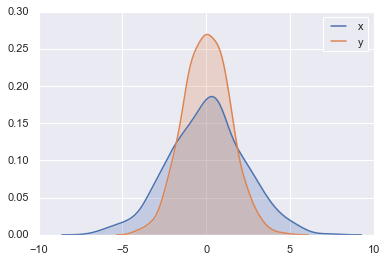

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

С помощью функции distplot можно сочетать гистограммы и KDE:


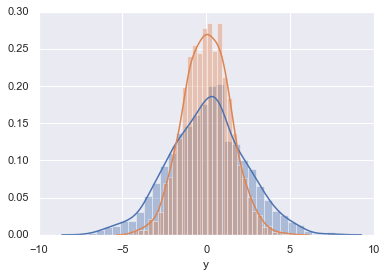

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Если передать функции kdeplot весь двумерный набор данных, можно получить двумерную визуализацию данных:

C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


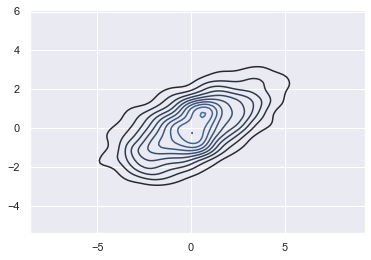

In [9]:
sns.kdeplot(data);

Посмотреть на совместное распределение и частные распределения можно, воспользовавшись функцией sns.jointplot. Для этого графика мы зададим стиль с белым фоном:

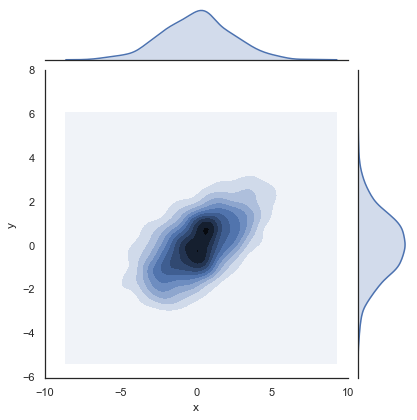

In [10]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde');

Функции jointplot можно передавать и другие параметры, например можно воспользоваться гистограммой на базе шестиугольников:

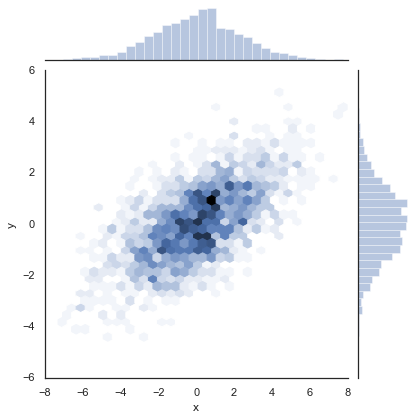

In [11]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

При обобщении графиков совместных распределений на наборы данных более высоких размерностей мы постепенно приходим к графикам пар (pair plots). Они очень удобны для изучения зависимостей между многомерными данными, когда необходимо построить график всех пар значений.

Мы продемонстрируем это на уже знакомом вам наборе данных Iris, содержащем измерения лепестков и чашелистиков трех видов ирисов:

In [12]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализация многомерных зависимостей между выборками сводится к вызову функции sns.pairplot:

C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


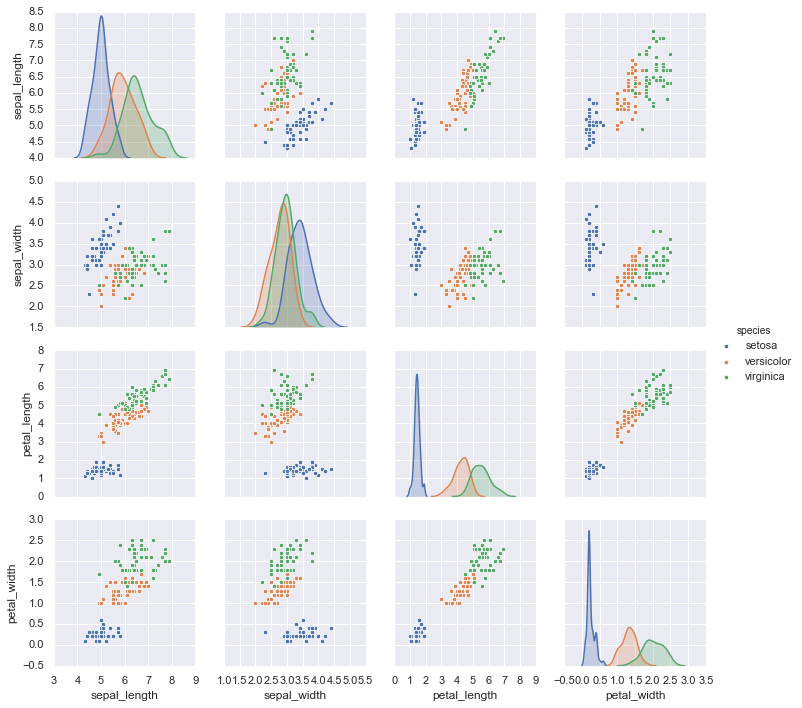

In [13]:
sns.pairplot(iris, hue='species', size=2.5);

### Фасетные гистограммы

Иногда оптимальный способ представления данных — гистограммы подмножеств. Функция FacetGrid библиотеки Seaborn делает эту задачу элементарной. Рассмотрим данные, отображающие суммы, которые персонал ресторана получает в качестве чаевых, в зависимости от данных различных индикаторов:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


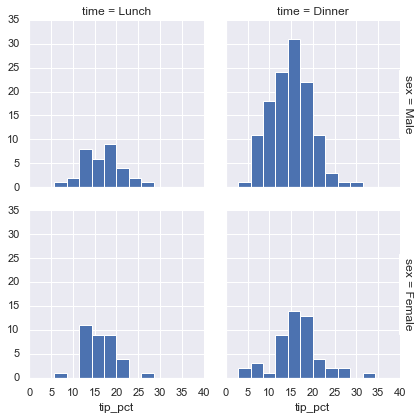

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

### Графики факторов

Графики факторов тоже подходят для подобных визуализаций. Они позволяют просматривать распределение параметра по интервалам, задаваемым посредством любого другого параметра:

C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


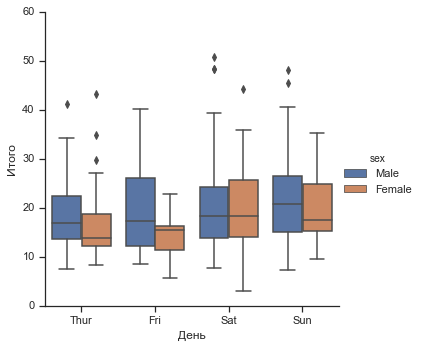

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('День', 'Итого');

### Совместные распределения

Аналогично графикам пар, которые мы рассматривали ранее, мы можем воспользоваться функцией sns.jointplot для отображения совместного распределения между различными наборами данных, а также соответствующих частных распределений:

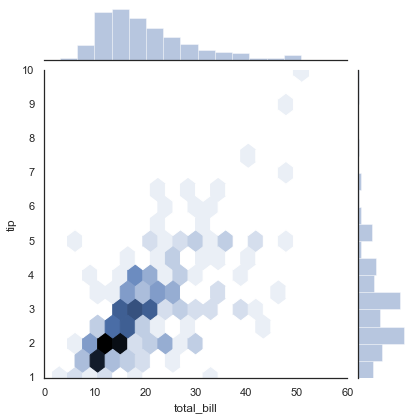

In [17]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

График совместного распределения позволяет даже выполнять автоматическую ядерную оценку плотности распределения и регрессию:

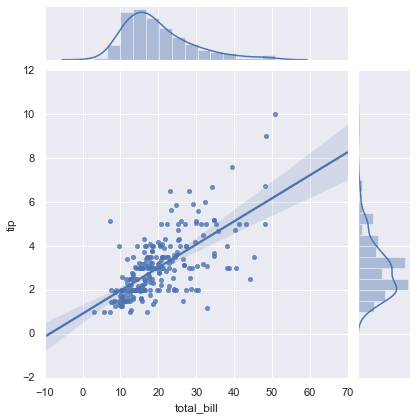

In [18]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg');

### Столбчатые диаграммы

Графики временных рядов можно строить с помощью функции sns.factorplot.

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


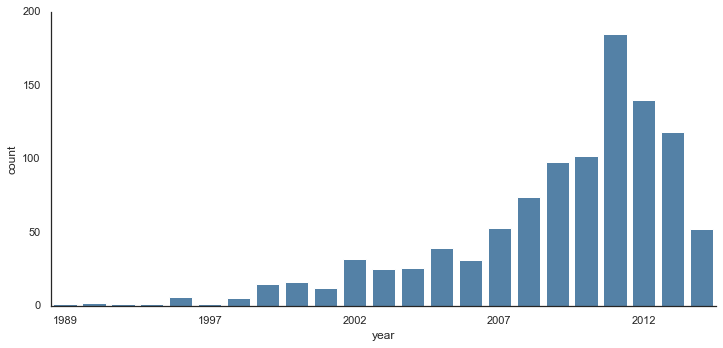

In [20]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

Мы можем узнать больше, если посмотрим на метод, с помощью которого была открыта каждая из этих планет:

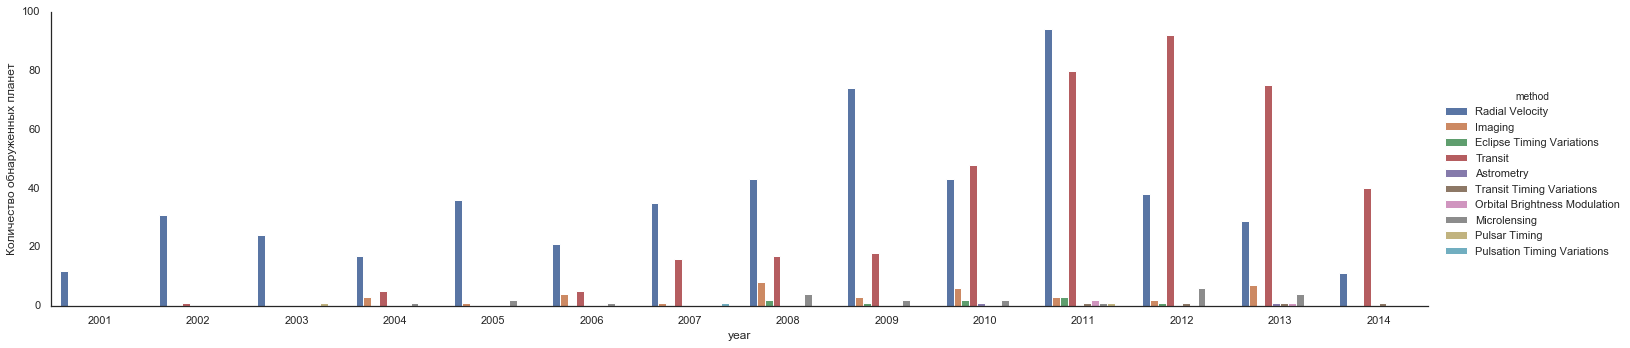

In [21]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Количество обнаруженных планет')

Дополнительную информацию о построении графиков с помощью библиотеки Seaborn можно найти в документации, справочном руководстве и галерее Seaborn.

## Пример: время прохождения марафона

В этом разделе мы рассмотрим использование библиотеки Seaborn для визуализации и анализа данных по времени прохождения марафонской дистанции. Эти данные я собрал из различных интернет-источников, агрегировал, убрал все идентифицирующие данные и поместил на GitHub, откуда их можно скачать (если вас интересует использование языка Python для веб-скрапинга, рекомендую книгу Web Scraping with Python (http://shop.oreilly.com/product/063 69200 34391.do) Райана Митчелла. Начнем со скачивания данных из Интернета и загрузки их в Pandas:

In [22]:
data = pd.read_csv('Exam\marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


По умолчанию библиотека Pandas загружает столбцы с временем как строки Python (тип object), убедиться в этом можно, посмотрев значение атрибута dtypes объекта DataFrame:

In [23]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Исправим это, создав функцию для преобразования значений времени:

In [34]:
def convert_time(s):
    return pd.to_timedelta(s)

data = pd.read_csv('Exam\marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [35]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Выглядит намного лучше. Добавим для использования при построении графиков столбцы с временем в секундах:

In [39]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


Чтобы понять, что представляют собой данные, можно нарисовать для них график jointplot:


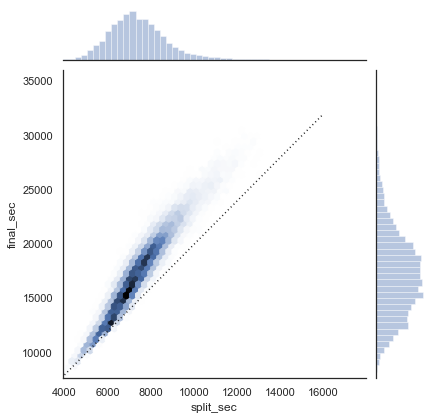

In [40]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

Пунктирная линия показывает, каким было бы для бегунов время прохождения всего марафона, если бы они бежали его с неизменной скоростью. Распределение лежит выше этой прямой, и это значит (как и можно было ожидать), что большинство людей снижает скорость по мере прохождения дистанции. Если вы участвовали в марафонах, то знаете, что в случае бегунов, поступающих наоборот — ускоряющихся во время второй части дистанции, — говорят об обратном распределении сил.

Создадим в данных еще один столбец, коэффициент распределения, показывающий, степень прямого и обратного распределения сил каждым бегуном:

In [41]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


Если этот коэффициент меньше нуля, значит, соответствующий спортсмен распределяет свои силы в обратной пропорции на соответствующую долю. Построим график распределения этого коэффициента:

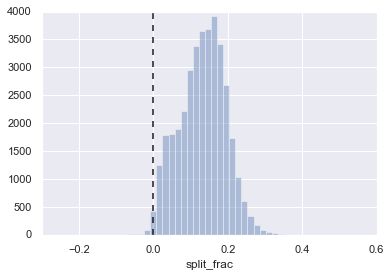

In [42]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--');

In [43]:
sum(data.split_frac < 0)

251

Из почти 40 000 участников только 250 человек распределяют свои силы на марафонской дистанции в обратной пропорции.

Выясним, существует ли какая-либо корреляция между коэффициентом распределения сил и другими переменными. Для построения графиков всех этих корреляций мы воспользуемся функцией pairgrid:

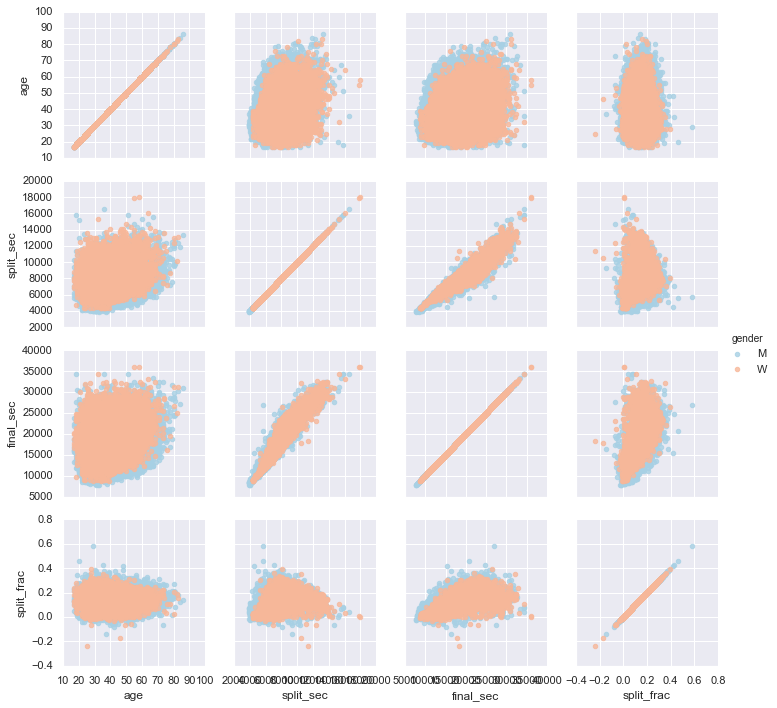

In [44]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Похоже, что коэффициент распределения сил никак не коррелирует с возрастом, но коррелирует с итоговым временем забега: более быстрые бегуны склонны распределять свои силы поровну. Как мы видим на этом графике, библиотека Seaborn — не панацея от «недугов» библиотеки Matplotlib, если речь идет о стилях графиков: в частности, метки на оси X перекрываются. Однако, поскольку результат — простой график Matplotlib, можно воспользоваться методами из раздела «Пользовательские настройки делений на осях координат» данной главы для настройки подобных вещей.

Кроме того, представляет интерес различие между мужчинами и женщинами. Рассмотрим гистограмму коэффициентов распределения сил для этих двух групп:

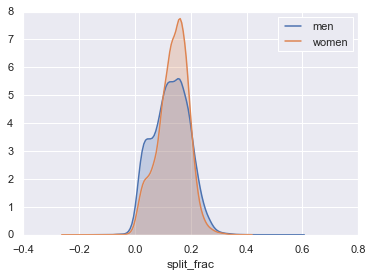

In [46]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

Интересно здесь то, что мужчин, чьи силы распределены практически поровну, намного больше, чем женщин! Это выглядит практически как какое-то бимодальное распределение по мужчинам и женщинам. Удастся ли нам разобраться, в чем дело, взглянув на эти распределения как на функцию возраста?

Удобный способ сравнения распределений — использование так называемой скрипичной диаграммы:

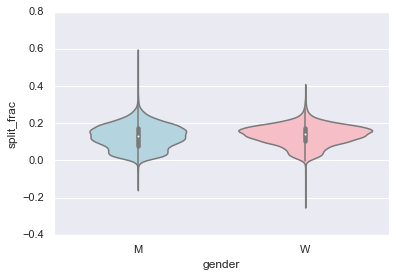

In [47]:
sns.violinplot('gender', 'split_frac', data=data, palette=['lightblue', 'lightpink']);

Есть и еще один способ сравнить распределения для мужчин и женщин.

Заглянем чуть глубже и сравним эти «скрипичные» диаграммы как функцию возраста. Начнем с создания в массиве нового столбца, отражающего возраст бегуна с точностью до десятилетия:

In [49]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


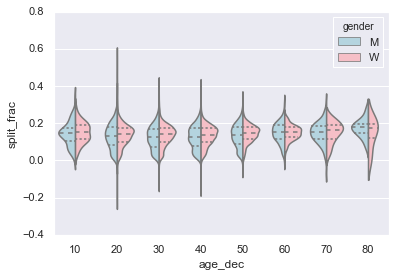

In [50]:
men = (data.gender == 'M')
women = (data.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data, split=True, inner='quartile', palette=['lightblue', 'lightpink']);

При взгляде на этот график заметно, в чем именно различаются распределения для мужчин и женщин. Распределения для мужчин возраста от 20 до 50 лет демонстрируют выраженную склонность к более низким значениям коэффициента разбиения по сравнению с женщинами того же возраста (или вообще любого возраста).
И на удивление, 80-летняя женщина, похоже, обошла всех в смысле распределения сил. Вероятно, дело в том, что мы оцениваем распределение на малых количествах, ведь бегунов такого возраста всего несколько:

In [52]:
(data.age > 80).sum()

7

Возвращаясь к мужчинам с обратным распределением сил: кто эти бегуны? Существует ли корреляция между этим обратным распределением сил и быстрым прохождением марафона в целом? Мы можем легко построить соответствующий график. Воспользуемся функцией regplot, автоматически выполняющей подбор параметров линейной регрессии для имеющихся данных:

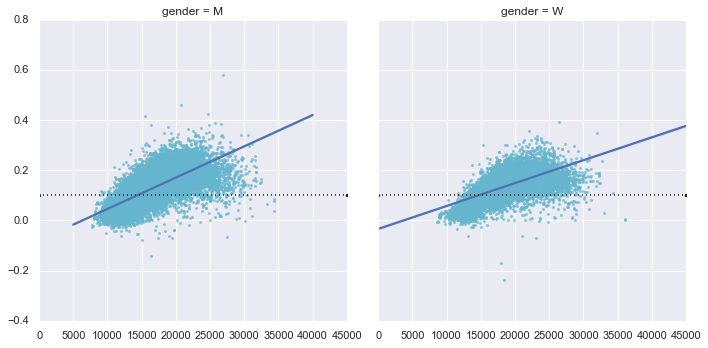

In [54]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':');

Как видим, люди с низким значением коэффициента распределения сил — элитные бегуны, финиширующие в пределах 15 000 секунд (примерно 4 часов). Вероятность подобного распределения сил для более медленных бегунов невелика.